In [16]:
import pandas as pd
import geopandas
%matplotlib inline


In [18]:
df = pd.read_csv("signdata.csv")
pd.set_option('display.max_rows', None)

## want to get a df with just the signs i care about
## create query for each sign i care about and combine them
stop_query = df['description'] == 'Stop'
stop = df[stop_query]
## query of stop signs 
yield_query = df['description'] == "Yield"
yeild = df[yield_query]
## query of yeild signs
speed_query = df['description'] == "Speed Limit"
speed = df[speed_query]
## query of speed signs 
ped_query = df['description'] == "Pedestrian"
ped = df[ped_query]
## query of ped signs 
blind_ped_query = df['description'] == "Blind Pedestrian Crossing"
b_ped = df[blind_ped_query]
## query of blind ped signs 
cross_ped_query = df['description'] == "Yield to Peds in Crosswalk"
c_ped = df[cross_ped_query]
## query of crossing ped signs 

## append new DFs together to get one with just the signs we care about 
df1 = stop.append(speed)
df2 = df1.append(yeild)
df3 = df2.append(ped)
df4 = df3.append(b_ped)
df5 = df4.append(c_ped)

##sort df5 by neighborhoods
df5 = df5.sort_values('neighborhood')

df5.drop(['address_number', "street", 'mutcd_code', 'mounting_fixture',
          'date_installed', 'council_district', 'ward', 'tract', 'police_zone'
          , 'public_works_division', 'fire_zone', 'longitude', 'latitude',
          'pli_division', 'city', 'id'], axis = 1, inplace = True)

df5 = df5.groupby(['neighborhood', 'description']).value_counts()

FileNotFoundError: [Errno 2] No such file or directory: 'signdata.csv'

In [12]:
%%capture 
## want to run but not run output 
df5 = df5.to_frame(name = 'sign count')
## df5 turned into seris had to turn it back 

NameError: name 'df5' is not defined

In [6]:
##create score col
df5['score'] = df.apply(lambda _: '', axis = 1)

In [7]:
## weight diffrent sign types per neighborhood
df5.reset_index(inplace = True)
score = []
x = df5['sign count']
i = 0
y = df5['description']
for index, row in df5.iterrows():
    if y[i] == 'Stop':
        score.append(x[i] * 1)
        i += 1
    elif y[i] == 'Speed Limit':
        score.append(x[i] * 0.5)
        i += 1
    elif y[i] == 'Pedestrian':
        score.append(x[i] * 1)
        i += 1
    elif y[i] == 'Yield':
        score.append(x[i] * 0.75)
        i += 1
    elif y[i] == 'Blind Pedestrian Crossing':
        score.append(x[i] * 2)
        i += 1
    else: ##yeild to ped 
        score.append(x[i] * 1.5)
        i += 1
df5['score'] = score

In [8]:
##get total scores by neighborhood
s_total = df5.groupby('neighborhood').sum()
s_total.drop(['sign count'], axis = 1, inplace = True)
s_total = s_total.sort_values('score', ascending = True)

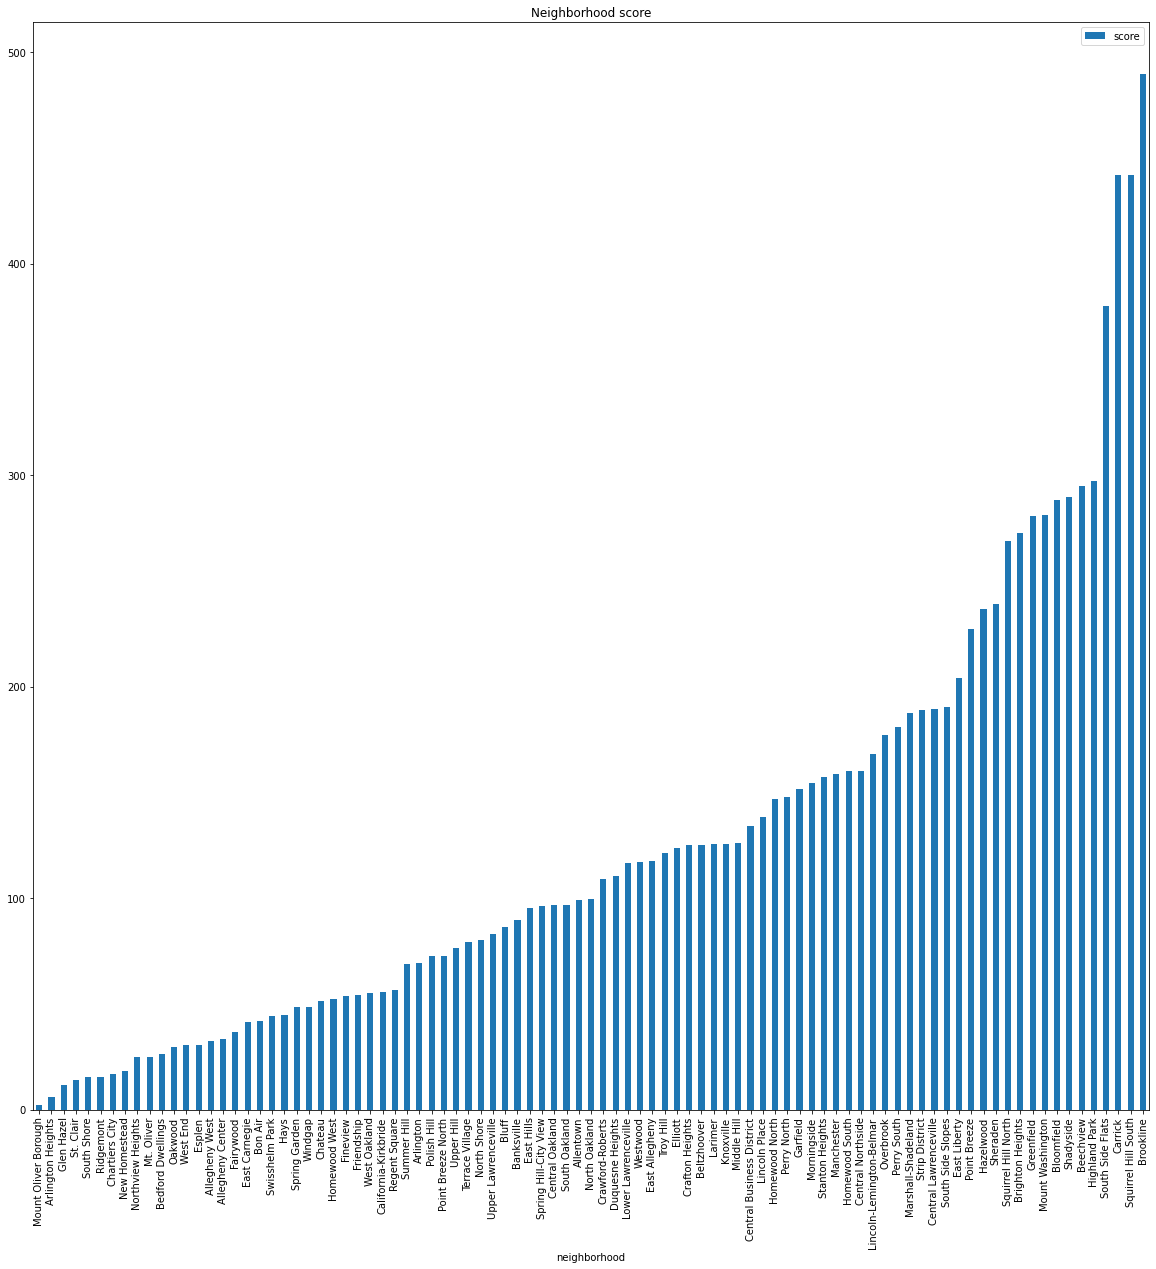

In [9]:
s_total.plot(kind = 'bar', title = 'Neighborhood score', figsize = (20,20), stacked = True)

## Conclusion 
By looking at the signs in pittsburgh data set I found that Brookline is the safest neighborhood to J-walk. I first looked at all of the sign types that the data set had and created a smaller one with just the sign types I deemed to be pedstrian friendly. I grabbed the count of each sign type in eacah neighborhood. I gave all the sign types diffrent wieghts based on how much I belived that sign would cause a driver to look out for pedstrians in the street. After applying the weight to the sign count I added the points up of each neighborhood as an overall metric to base the safest neighborhood to J-walk in. I grew up in pittsburgh but have still only been to brookline a handful of times adn have never J-walked there so i personally cannot judge this. I do belive that others are ranked correctly though, for example sq. hill south is very high on the list and this makes sense, it has lots of schools, snyogauges, residental housing and buisnesses.